In [65]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [66]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)
print(y.shape,X.shape)

(200, 1) (200, 2)


Use `least_squares` to compute w, and visualize the results.

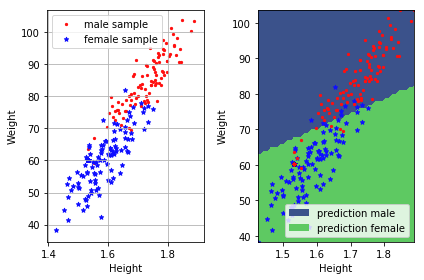

In [67]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    mse, w = least_squares(y, tx)
    # w = least squares with respect to tx and y

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [68]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    return 1 / (1 + np.exp(-t))
    # ***************************************************
    raise NotImplementedError

In [71]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    loss = - y.T @ np.log(sigmoid(tx @ w)) - (np.ones(y.shape) -y).T @ np.log(1 - sigmoid(tx @ w))
    return loss 

In [72]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    grad = tx.T @ (sigmoid(tx @ w) - y)
    return grad

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [73]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the loss: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    grad = calculate_gradient(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma * grad
    return loss, w

Demo!

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[43.46403231]]
Current iteration=200, loss=[[41.54589281]]
Current iteration=300, loss=[[41.09863897]]
Current iteration=400, loss=[[40.96487064]]
Current iteration=500, loss=[[40.92008946]]
Current iteration=600, loss=[[40.90418744]]
Current iteration=700, loss=[[40.89834995]]
Current iteration=800, loss=[[40.89616497]]
Current iteration=900, loss=[[40.89533753]]
Current iteration=1000, loss=[[40.89502196]]
Current iteration=1100, loss=[[40.89490109]]
Current iteration=1200, loss=[[40.89485466]]
Current iteration=1300, loss=[[40.8948368]]
Current iteration=1400, loss=[[40.89482992]]
Current iteration=1500, loss=[[40.89482727]]
loss=[[40.89482664]]


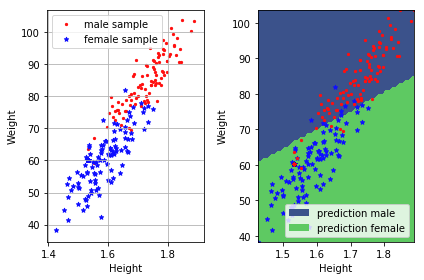

In [74]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [135]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate Hessian: TODO
    # ***************************************************
    f = sigmoid(tx @ w) * (1 - sigmoid(tx @ w))
    S = np.diag(f[:,0])
    return tx.T @ S @ tx

Write a function below to return loss, gradient, and Hessian.

In [136]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    return calculate_loss(y, tx, w), calculate_gradient(y, tx, w), calculate_hessian(y, tx, w)

### Using Newton's method
Use Newton's method for logistic regression.

In [137]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and Hessian: TODO
    # ***************************************************
    loss, gradient, hessian = logistic_regression(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = np.linalg.solve(hessian, hessian @ w - gamma * gradient)
    return loss, w

demo

Current iteration=0, the loss=[[138.62943611]]
Current iteration=1, the loss=[[63.41155374]]
Current iteration=2, the loss=[[47.3045862]]
Current iteration=3, the loss=[[41.99746742]]
Current iteration=4, the loss=[[40.95639864]]
Current iteration=5, the loss=[[40.89511994]]
Current iteration=6, the loss=[[40.89482562]]
Current iteration=7, the loss=[[40.89482561]]
loss=[[40.89482561]]


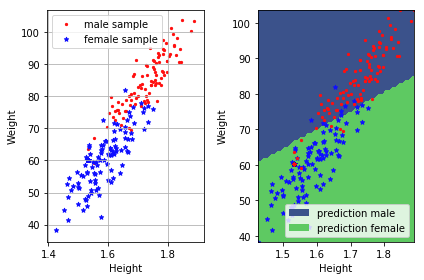

In [138]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [ ]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

In [ ]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)